In [50]:
from src.api.tradier import TradierAPI
from src.api.polygon import PolygonAPI
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import numpy as np
import time

In [8]:
api = TradierAPI()
chain, _, _, _ = api.fetch_chain('AAPL', '2020-10-09', greeks=True)

In [10]:
api = PolygonAPI()
underlying = api.fetch_last_quote('AAPL')

In [37]:
strikes = np.array([l['strike'] for l in chain if l['option_type'] == 'put' and l['strike'] > underlying])
deltas = np.array([l['greeks']['delta'] for l in chain if l['option_type'] == 'put' and l['strike'] > underlying])

In [69]:
now = time.time()
coefs = poly.polyfit(strikes, deltas, 11)
ffit = poly.polyval(strikes, coefs)
then = time.time()
print('Total time: {}ms'.format((then - now) * 1000))

Total time: 0.5190372467041016ms


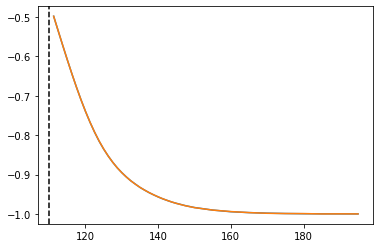

In [70]:
plt.plot(strikes, deltas)
plt.plot(strikes, ffit)
plt.axvline(x=underlying, color='k', linestyle='--')
plt.show()

In [71]:
print(poly.polyval(120.14351345, coefs))

-0.7430544582894072
